# evaluate_optimal_CNN
- Having optimised model architecture and tuned hyperparameters (at least learning rate and number of filters in convolutional layers), now evaluating the best model using various metrics : i.e. regression vs test values

In [22]:
import keras 
import numpy as np
from sklearn import model_selection
import sdss_model_evaluate
from scipy import stats

import harry_plotter
from matplotlib import rcParams
harry_plotter.default(rcParams)


In [10]:
data_dir = '../../data/cleaned_datasets/'

x = np.load(data_dir + 'x.npy')
y = np.load(data_dir + 'y.npy')

train_ratio = 0.70
validation_ratio = 0.15
test_ratio = 0.15

# creating training sample
X_train, X_test, y_train, y_test = model_selection.train_test_split(x, y, test_size = 1 - train_ratio)

# creating test and validation training samples.
X_val, X_test, y_val, y_test = model_selection.train_test_split(X_test, y_test, test_size = test_ratio / (test_ratio + validation_ratio)) 
y_train.shape, y_val.shape, y_test.shape

((4505,), (966,), (966,))

In [24]:
model = keras.models.load_model('../final-model/saved-model-25-0.02.hdf5')

test_loss = model.evaluate(X_test, y_test)
y_predicted = model.predict(X_test).ravel()

31/31 [==============================] - 8s 269ms/step - loss: 0.0238


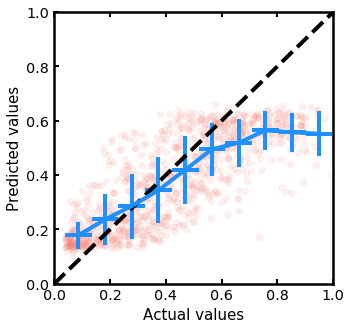

In [25]:
ax = sdss_model_evaluate.plot_regression(y_test, y_predicted)

In [26]:
stats.pearsonr(y_test, y_predicted)

(0.7918678398159261, 1.1062150087119807e-208)